___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Microestructuras y Sistema de Trading
## Laboratorio 1

### EQUIPO:
#### - Tere Castillo
#### - Ana Laura Correa
#### - Gaspar Benitez
#### - Marysol Cantarero

#### Situación: 
Acabas de entrar a trabajar a una operadora de fondos de inversión como analista financiero dentro de la mesa de análisis del mercado de renta variable. En la junta trimestral se plantea la posibilidad de crear un fondo propio con exposición al mercado de valores de USA tratando de replicar a los ETFs conocidos como ishares que la empresa BlackRock ofrece. 

La idea es replicar un ETF con posiciones en directo. Te han asignado la tarea de hacer un ejercicio simple de replicar la construcción de un portafolio de inversión y un criterio de rebalanceo lo más parecido a un ETF de ishares que tu selecciones. Esto con la finalidad de comparar los resultados de haber rebalanceado periódicamente el portafolio, ó, no haberlo hecho y continuar todo un año con las mismas posiciones.


#### Resolucion del problema

Los ETF(Exchange Trade Funds) son fondos o instrumentos de inversión cuyos títulos cotizan en la bolsa, al igual que una acción bursátil,pudiendose comprar y vender en cualquier momento, sin necesidad de esperar al cierre del mercado. Su objetivo es replicar el comportamiento de los activos que componen un índice bursátil, ya sea de renta fija, variable, divisas o materias primas u otros activos financieros.

Para este problema se analizara el ETF "iShares U.S. Financials ETF (IYF)" para el mercado de renta variable de USA con posiciones en directo tomando información del 01/Marzo/2018 al 01/Marzo/2019. Sin embargo, el código a realizar debe ser repetible para cualquier ETF.

Las 3 medidas de atribución al desempeño que se eligieron para la comparación de los resultados son: Rendimiento, volatilidad y medidas de desempeño.

#### Características mínimas de solución: 
Debido a tu formación, te piden que este proceso que construyas sea repetible para cualquier ETF y también incluir 3 medidas de atribución al desempeño, tanto para el caso que el ETF nunca hubiese sido rebalanceado como para los casos donde sí. 

En la mesa de análisis están interesados en conocer el proceso que sigues para adquirir, limpiar, dar formato y utilizar los datos, y a pesar que el equipo senior de análisis está compuesto por personal altamente calificado en temas de economía y finanzas, ellos no saben programar por lo que te piden que incluyas el código utilizado, y que sea de manera ordenada y explicando el sentido de las funciones y paqueterías que requeriste. 

Comparar con 1 año de información: 01/Marzo/2017 al 01/Marzo/2018 

Utilizar un ETF de Ishares para el mercado de renta varialbe de USA 

Entregar un Jupyter Notebook con explicación y comentarios en el código 

Crear y actualizar continuamente un repositorio en GitHub para el proyecto.

#### Resolucion del problema

Los ETF(Exchange Trade Funds) son fondos o instrumentos de inversión cuyos títulos cotizan en la bolsa, al igual que una acción bursátil,pudiendose comprar y vender en cualquier momento, sin necesidad de esperar al cierre del mercado. Su objetivo es replicar el comportamiento de los activos que componen un índice bursátil, ya sea de renta fija, variable, divisas o materias primas u otros activos financieros.

Para este problema se analizara el ETF "iShares U.S. Financials ETF (IYF)" para el mercado de renta variable de USA con posiciones en directo tomando información del 01/Marzo/2017 al 01/Marzo/2018. Sin embargo, el código a realizar debe ser repetible para cualquier ETF.

Las 3 medidas de atribución al desempeño que se eligieron para la comparación de los resultados son: Rendimiento, volatilidad y medidas de desempeño.

In [1]:
# Descarga de librerías
import quandl
import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"  # API key Quandl
narch = 13
fechas = list(['2017-02-28', '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30',
                 '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31', '2017-11-30',
                 '2017-12-29', '2018-01-31', '2018-02-28'])
tl = [0.4, 0.74, 0.68, 0.86 , 0.84, 1, 0.95, 0.96, 0.99 , 1.14 ,0.28 , 1.43, 1.5]

### DESCARGA DE DATOS

In [4]:
# Función para descarga de archivos csv de holdings etf, sus tickers y
# los shares oustanding(número de acciones en circulación).
def holdings_csv(narch,name):
    # Listas para guardar informacion
    holdings = []
    tickers = []
    shares = []
    # Es un ciclo para jalar los 12 archivos y cambiar el nombre automaticamente.
    for i in range(narch):
        r = name+str(i)+".csv"
        info = pd.read_csv(r,header=10, index_col= 0)
        shar = pd.read_csv(r,nrows=7).loc['Shares Outstanding'][0]#.loc nos localiza Shares Outstanding, [0] jala solo el valor numerico
        info = info.dropna() #Quitan los datos vacios.
        info = info.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
        holdings.append(info) #A mi lista le agrego "info"
        tickers.append(list(holdings[i].index)) #A tickers agregar Holdings pero ciclicamente de 1 a 12.
        shares.append(shar) #Jala shares y los agrega a una nueva lista.
    return holdings, tickers, shares #Regresa las 3 listas pero ya con informacion.
holdings, tickers, shares = holdings_csv(narch,"IYF_holdings") #Guarda las listas.

### Función para descarga de datos históricos y agrupacion de tickers por fecha (QUANDL)

In [6]:
def download_quandl(fechas, tickers): #Jala los tickers y fechas
    date = {'gte': fechas[0], 'lte': fechas[-1] } #Toma la primer fecha de la lista y la ultima fecha de la lista.
    column = {'columns': ['ticker', 'date', 'Adj_close']} #Que necesito de Quandl
    # Quandl > Tools > Python
    data = quandl.get_table('WIKI/PRICES', qopts=column, ticker=tickers, date=date, paginate=True) 
    data = data.set_index('date')
    data = data.pivot(columns='ticker') # agrupacion de tickers por fecha 
    data.columns = data.columns.droplevel(0)
    return data

### Función para convertir de "str" a "float"

In [8]:
def str_to_float(var): #Defines variable
    st=var #Si la variabl es flotante, regresa el mismo valor.
    if type(var[0]) != np.float64: #Si el valor de la variable no es float, comienza el ciclo.
        st=[] # Arranca lista vacia para guardar informacion.
        for i in var: #Para i, agarrara cada valor de la varible, le quitara la "," y la sustituye por un vacio. Tambien convierte la variable en un flotante.
            st.append(float(i.replace(',','')))
    return (st)

### Función para calcular el rendimiento de las series

In [9]:
def Rend(narch,nav): 
    h =[]# "h" comienza como lista vacia
    for i in range(narch-1): # el (-1) es para que nos permita realizar la iteacion.
        y= np.log(nav[i+1]/nav[i]) #Formula de rendimiento.
        h.append(y) #Va haciendo append a los resultados.
    return h #Nos regresa "h"

### Función para calcular las medidas de desepeño (Rendimiento, Variación y Sharpe)

In [62]:
def medidas_desempeño(Rend,tl):
    media = np.mean(Rend) #Media de los rendimientos
    std = np.std(Rend) #Desv Stndr de los rendimientos
    sharpe = (media -tl[i]/100)/std #Sharpe
    return media, std, sharpe #Regresa los resultados

### LIMPIEZA DE INFORMACIÓN

In [10]:
# Juntando tickers para hacer un mismo indice
venta=[] 
igual=[] 
compra=[] 
for i in range(narch-1):
    venta.append(list(set(tickers[i])-set(tickers[i+1]))) # Compara listas de tickers, guarda las que se eliminaron
    igual.append(list(set(tickers[i+1])-set((set(tickers[i+1])-set(tickers[i]))))) # Compara tickers, guarda las iguales
    compra.append(list(set(tickers[i+1])-set(tickers[i])))  # Compara tickers, guarda las que se compraron
venta = list(np.concatenate(venta)) #Concatena las ventas
igual = list(np.concatenate(igual)) #Concatena las que estan iguales
compra = list(np.concatenate(compra)) #Concatena las compras
indice = list(set(venta+igual+compra)) #Junta todo el set como un solo indice

In [11]:
# Acomodo de información de acuerdo a índice(tickers) en común (Weight(%), Price y Shares)
Weights , Prices, Shares = pd.DataFrame(index=indice) , pd.DataFrame(index=indice), pd.DataFrame(index=indice)
for i in range(narch):
    l,l1,l2= [],[],[]
    for j in range(len(tickers[i])):
        l.append(holdings[i]['Weight (%)'][tickers[i][j]])
        l1.append(holdings[i]['Price'][tickers[i][j]])
        l2.append(holdings[i]['Shares'][tickers[i][j]])
    l , l1, l2 = pd.DataFrame(l, index=tickers[i]),pd.DataFrame(str_to_float(l1), index=tickers[i]),pd.DataFrame(str_to_float(l2), index=tickers[i])
    Weights['Holdings'+str(i)+''] ,Prices['Holdings'+str(i)+''],Shares['Holdings'+str(i)+''] = l ,l1 , l2

# ESCENARIOS REBALANCEOS

El primer escenario es igual al original para la comparación final, para los demás escenarios realizan distintos rebalanceos.

Por ejemplo(periodo rebalanceos): segundo escenario = [0], tercer escenario = [0,1] , cuarto escenario = [0,1] , ... , ultimo escenario = [0,11]

En el segundo escenario no hay rebalanceos, es decir, se mantienen las mismas posiciones durante todo el año.
Del tercer al ultimo escenario únicamente hay un rebalanceo mensual, el cual se va recorriendo mensualmente por escenario.

### ESCENARIO A -  ORIGINAL

In [12]:
def nav(narch):
    nav = [] #Lista vacia
    for i in range(narch): #Ciclo de i hasta narch
        mult = Prices['Holdings'+str(i)+''].dropna() * Shares['Holdings'+str(i)+''].dropna() #Ciclando la lista "Holdings" y dejando ir los vacios
        mult.loc['USD'] = mult.loc['USD']/100 #Especial para los dolares
        nav.append(sum(mult) / str_to_float(shares)[i]) #Obtiene NAV que es (suma de mult)/shares 
    return nav
navA = nav(narch)
navA

[107.66478606632664,
 103.75565147341044,
 103.78729682901238,
 103.3777690273885,
 107.17077279021396,
 109.50167307784432,
 108.45363532186583,
 112.13038047386371,
 112.85907624000002,
 118.38547004240691,
 119.28937116196312,
 127.2509493137931,
 122.42896706809643]

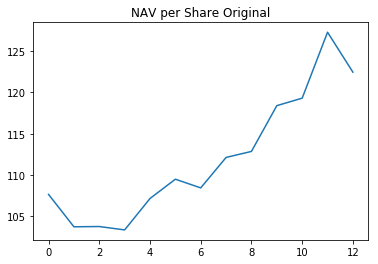

In [11]:
plt.plot(navA)
plt.title('NAV per Share Original')
plt.show()

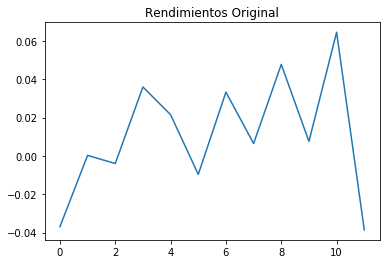

In [12]:
plt.plot(Rend(narch,navA))
plt.title('Rendimientos Original')
plt.show()

### ESCENARIO B - SIN REBALANCEOS (P0)
Mismas posiciones de Periodo 0.  - > [0]

In [13]:
#Buscando activos con datos faltantes de precios para buscarlos en quandl
na_free = Prices.dropna()
only_na = Prices[np.invert(Prices.index.isin(na_free.index))]
idx_only_na = list(only_na.index)
na_free.head() #only_na

,Holdings0,Holdings1,Holdings2,Holdings3,Holdings4,Holdings5,Holdings6,Holdings7,Holdings8,Holdings9,Holdings10,Holdings11,Holdings12
COR,90.07,90.05,97.85,105.28,103.53,108.58,118.76,111.90,110.75,113.48,113.90,108.32,93.85
AXP,80.06,79.11,79.25,76.94,84.24,85.23,86.10,90.46,95.52,97.71,99.31,99.40,97.51
REG,70.35,66.39,63.18,60.86,62.64,66.22,64.32,62.04,61.55,67.81,69.18,62.91,58.11
WBS,54.93,50.04,50.81,48.72,52.22,51.93,46.68,52.55,54.99,57.37,56.16,56.62,54.58
CFFN,15.09,14.63,14.63,13.82,14.21,14.26,13.72,14.70,13.79,14.06,13.41,13.08,12.49


In [14]:
#descargando datos quandl y agrupando por fechas mensuales requeridas.
prices = download_quandl(fechas, idx_only_na) #Descarga de datos sobre informacion que no se tiene
prices_m = pd.DataFrame(index= fechas) #Data Frame con el indice de las fechas
for i in prices.columns:
    x = pd.DataFrame([prices[i].loc[fechas[z]] for z in range(len(fechas))],index=fechas)
    prices_m[str(i)] = x
prices_m = prices_m.T
prices_m.columns = ['Holdings'+str(i)+'' for i in range(narch)]
prices_m

,Holdings0,Holdings1,Holdings2,Holdings3,Holdings4,Holdings5,Holdings6,Holdings7,Holdings8,Holdings9,Holdings10,Holdings11,Holdings12
AWH,52.820000,53.100000,53.090000,52.570000,52.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BGCP,10.941332,11.018930,11.038330,11.621971,12.459857,12.430285,12.990000,14.470000,15.170000,16.33,15.11,14.305,13.22
BHF,NaN,NaN,NaN,NaN,NaN,NaN,57.070000,60.800000,62.180000,58.79,58.64,64.260,54.27
CACC,200.460000,199.410000,203.250000,215.020000,257.140000,249.100000,272.300000,280.170000,286.730000,302.90,323.48,329.710,314.69
CHFC,52.367602,50.531217,46.875978,44.692713,48.111502,47.892858,45.410000,52.260000,52.690000,56.39,53.47,58.410,55.19
CYS,7.336447,7.507919,8.055666,7.961227,8.171621,8.268787,8.540850,8.640000,8.000000,8.09,8.03,6.740,6.32
DFT,50.552374,49.187353,51.131439,54.186431,61.160000,62.330000,64.360000,NaN,NaN,NaN,NaN,NaN,NaN
ENH,92.550816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EQY,31.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESNT,34.810000,36.170000,37.010000,36.270000,37.140000,38.420000,39.080000,40.500000,42.620000,44.25,43.42,46.520,45.09


In [15]:
#Agregando datos encontrados de Quandl.
na_free = na_free.append(prices_m.dropna())
na_free

,Holdings0,Holdings1,Holdings2,Holdings3,Holdings4,Holdings5,Holdings6,Holdings7,Holdings8,Holdings9,Holdings10,Holdings11,Holdings12
COR,90.070000,90.050000,97.850000,105.280000,103.530000,108.580000,118.760000,111.900000,110.750000,113.48,113.90,108.320,93.85
AXP,80.060000,79.110000,79.250000,76.940000,84.240000,85.230000,86.100000,90.460000,95.520000,97.71,99.31,99.400,97.51
REG,70.350000,66.390000,63.180000,60.860000,62.640000,66.220000,64.320000,62.040000,61.550000,67.81,69.18,62.910,58.11
WBS,54.930000,50.040000,50.810000,48.720000,52.220000,51.930000,46.680000,52.550000,54.990000,57.37,56.16,56.620,54.58
CFFN,15.090000,14.630000,14.630000,13.820000,14.210000,14.260000,13.720000,14.700000,13.790000,14.06,13.41,13.080,12.49
NAVI,15.410000,14.760000,15.200000,14.430000,16.650000,14.750000,13.200000,15.020000,12.460000,12.61,13.32,14.250,12.96
BRX,23.340000,21.460000,19.750000,18.040000,17.880000,19.590000,18.720000,18.800000,17.470000,18.07,18.66,16.230,15.54
AMP,131.500000,129.680000,127.850000,120.790000,127.290000,144.880000,138.510000,148.510000,156.540000,163.23,169.47,168.700,156.44
GBCI,36.920000,33.930000,33.780000,32.260000,36.610000,34.920000,33.210000,37.760000,37.960000,40.05,39.39,39.220,38.90
UDR,36.500000,36.260000,37.340000,38.610000,38.970000,39.090000,38.820000,38.030000,38.790000,39.33,38.52,36.530,33.62


In [16]:
#Para los que ya no se encontraron se pondrán los datos que estaban y se rellenaran los vacios con 0.
faltantes = list(set(Prices.index)- set(na_free.index))
faltantes = pd.DataFrame([Prices.loc[i] for i in faltantes]).fillna(0)
na_free = na_free.append(faltantes)
#Igualando a Prices ( es lo mismo pero ya con información completa)
Prices_F = na_free
Prices_F

,Holdings0,Holdings1,Holdings2,Holdings3,Holdings4,Holdings5,Holdings6,Holdings7,Holdings8,Holdings9,Holdings10,Holdings11,Holdings12
COR,90.070000,90.050000,97.850000,105.280000,103.530000,108.580000,118.760000,111.900000,110.750000,113.48,113.90,108.320,93.85
AXP,80.060000,79.110000,79.250000,76.940000,84.240000,85.230000,86.100000,90.460000,95.520000,97.71,99.31,99.400,97.51
REG,70.350000,66.390000,63.180000,60.860000,62.640000,66.220000,64.320000,62.040000,61.550000,67.81,69.18,62.910,58.11
WBS,54.930000,50.040000,50.810000,48.720000,52.220000,51.930000,46.680000,52.550000,54.990000,57.37,56.16,56.620,54.58
CFFN,15.090000,14.630000,14.630000,13.820000,14.210000,14.260000,13.720000,14.700000,13.790000,14.06,13.41,13.080,12.49
NAVI,15.410000,14.760000,15.200000,14.430000,16.650000,14.750000,13.200000,15.020000,12.460000,12.61,13.32,14.250,12.96
BRX,23.340000,21.460000,19.750000,18.040000,17.880000,19.590000,18.720000,18.800000,17.470000,18.07,18.66,16.230,15.54
AMP,131.500000,129.680000,127.850000,120.790000,127.290000,144.880000,138.510000,148.510000,156.540000,163.23,169.47,168.700,156.44
GBCI,36.920000,33.930000,33.780000,32.260000,36.610000,34.920000,33.210000,37.760000,37.960000,40.05,39.39,39.220,38.90
UDR,36.500000,36.260000,37.340000,38.610000,38.970000,39.090000,38.820000,38.030000,38.790000,39.33,38.52,36.530,33.62


In [23]:
def nav1(precios,narch):
    nav1 = []
    for i in range(narch):
        quitar = list(set(Prices_F.index)-set(tickers[0]))
        mult = Prices_F['Holdings'+str(i)+''].drop(quitar) * Shares['Holdings'+str(0)+''].drop(quitar)
        mult.loc['USD'] = mult.loc['USD']/100
        nav1.append((sum(mult)) / str_to_float(shares)[i])
    return nav1
navB = nav1(Prices_F,narch)
navB

[107.66233912020886,
 118.73298324510611,
 126.29060454502734,
 129.054698626111,
 129.42331133616747,
 128.78815836836046,
 123.75832239839147,
 124.79766047329548,
 121.35586809999994,
 132.53861431862464,
 143.40647294907973,
 140.57025023218384,
 126.43611979678288]

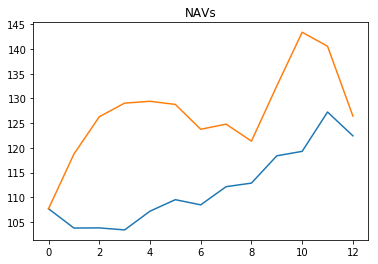

In [18]:
plt.plot(navA)
plt.plot(navB)
plt.title('NAVs')
plt.show()

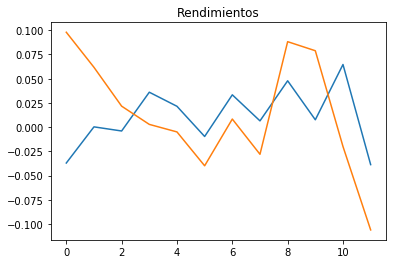

In [19]:
plt.plot(Rend(narch,navA))
plt.plot(Rend(narch,navB))
plt.title('Rendimientos')
plt.show()

### ESCENARIO C -  REBALANCEO P1
Mismas posiciones de Periodo 0, rebalanceo Periodo 1 - > [0,1]

In [35]:
def nav2(narch,preb):
    nav2 = []
    for i in range(preb):
        quitar = list(set(Prices_F.index)-set(tickers[0]))
        mult = Prices_F['Holdings'+str(i)+''].drop(quitar) * Shares['Holdings'+str(0)+''].drop(quitar)
        mult.loc['USD'] = mult.loc['USD']/100
        nav2.append((sum(mult)) / str_to_float(shares)[i])
    for i in range(narch-preb):
        quitar = list(set(Prices_F.index)-set(tickers[preb]))
        mult = Prices_F['Holdings'+str(i)+''].drop(quitar) * Shares['Holdings'+str(preb)+''].drop(quitar)
        mult.loc['USD'] = mult.loc['USD']/100
        nav2.append((sum(mult)) / str_to_float(shares)[i])
    return nav2
navC = nav2(narch,1)
navC

[107.66233912020886,
 93.90374491886823,
 103.75414487010443,
 110.36222082968968,
 112.76520556070153,
 113.06940055103986,
 112.51367967934064,
 108.12012359034128,
 109.00554419090903,
 105.98861210270272,
 115.76480415128941,
 125.25241741595084,
 122.74216168218395]

### ESCENARIO D-  REBALANCEO P2
Mismas posiciones de Periodo 0, rebalanceo Periodo 2 - > [0,2]

In [40]:
navD = nav2(narch,2)
navD

[107.66233912020886,
 118.73298324510611,
 88.31748048772423,
 97.58243442527379,
 103.78567569037443,
 106.0420560616159,
 106.3216095576366,
 105.79566252283942,
 101.66129472424389,
 102.48734131818173,
 99.64767293999999,
 108.83470172263605,
 117.74966630306743]

### ESCENARIO E -  REBALANCEO P3
Mismas posiciones de Periodo 0, rebalanceo Periodo 3 - > [0,3]

In [ ]:
navE = nav2(narch,3)
navE

### ESCENARIO F -  REBALANCEO P4
Mismas posiciones de Periodo 0, rebalanceo Periodo 4 - > [0,4]

In [ ]:
navF = nav2(narch,4)
navF

### ESCENARIO G -  REBALANCEO P5
Mismas posiciones de Periodo 0, rebalanceo Periodo 5 - > [0,5]

In [ ]:
navG = nav2(narch,5)
navG

### ESCENARIO H -  REBALANCEO P6
Mismas posiciones de Periodo 0, rebalanceo Periodo 6 - > [0,6]

In [ ]:
navH = nav2(narch,6)
navH

### ESCENARIO I -  REBALANCEO P7
Mismas posiciones de Periodo 0, rebalanceo Periodo 7 - > [0,7]

In [ ]:
navI = nav2(narch,7)
navI

### ESCENARIO J -  REBALANCEO P8
Mismas posiciones de Periodo 0, rebalanceo Periodo 8 - > [0,8]

In [ ]:
navJ = nav2(narch,8)
navJ

### ESCENARIO K -  REBALANCEO P9
Mismas posiciones de Periodo 0, rebalanceo Periodo 9 - > [0,9]

In [ ]:
navK = nav2(narch,9)
navK

### ESCENARIO L -  REBALANCEO P10
Mismas posiciones de Periodo 0, rebalanceo Periodo 10 - > [0,10]

In [ ]:
navL = nav2(narch,10)
navL

### ESCENARIO M -  REBALANCEO P11
Mismas posiciones de Periodo 0, rebalanceo Periodo 11 - > [0,11]

In [ ]:
navM = nav2(narch,11)
navM

### ESCENARIO N -  REBALANCEO P12
Mismas posiciones de Periodo 0, rebalanceo Periodo 12 - > [0,12]

In [44]:
navN = nav2(narch,12)
navN

[107.66233912020886,
 118.73298324510611,
 126.29060454502734,
 129.054698626111,
 129.42331133616747,
 128.78815836836046,
 123.75832239839147,
 124.79766047329548,
 121.35586809999994,
 132.53861431862464,
 143.40647294907973,
 140.57025023218384,
 102.63116458952825]

## TODO

In [49]:
NAVs = pd.DataFrame()
Rends = pd.DataFrame()
for i in range(narch):
    NAVs['REB_p'+str(i)+''] = nav2(narch,i)
    Rends['REB_p'+str(i)+''] = Rend(narch, nav2(narch,i))
NAVs

,REB_p0,REB_p1,REB_p2,REB_p3,REB_p4,REB_p5,REB_p6,REB_p7,REB_p8,REB_p9,REB_p10,REB_p11,REB_p12
0,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339,107.662339
1,118.732983,93.903745,118.732983,118.732983,118.732983,118.732983,118.732983,118.732983,118.732983,118.732983,118.732983,118.732983,118.732983
2,126.290605,103.754145,88.317480,126.290605,126.290605,126.290605,126.290605,126.290605,126.290605,126.290605,126.290605,126.290605,126.290605
3,129.054699,110.362221,97.582434,85.859177,129.054699,129.054699,129.054699,129.054699,129.054699,129.054699,129.054699,129.054699,129.054699
4,129.423311,112.765206,103.785676,94.861745,88.692874,129.423311,129.423311,129.423311,129.423311,129.423311,129.423311,129.423311,129.423311
5,128.788158,113.069401,106.042056,100.895697,97.987715,90.924127,128.788158,128.788158,128.788158,128.788158,128.788158,128.788158,128.788158
6,123.758322,112.513680,106.321610,103.376162,104.214926,100.448067,93.547064,123.758322,123.758322,123.758322,123.758322,123.758322,123.758322
7,124.797660,108.120124,105.795663,103.656694,106.782916,106.832557,103.348194,95.681113,124.797660,124.797660,124.797660,124.797660,124.797660
8,121.355868,109.005544,101.661295,103.139481,107.169961,109.472486,109.914540,105.719637,99.076148,121.355868,121.355868,121.355868,121.355868
9,132.538614,105.988612,102.487341,99.119043,106.628842,109.877946,112.632757,112.433726,109.470659,95.286388,132.538614,132.538614,132.538614


In [50]:
Rends

,REB_p0,REB_p1,REB_p2,REB_p3,REB_p4,REB_p5,REB_p6,REB_p7,REB_p8,REB_p9,REB_p10,REB_p11,REB_p12
0,0.097877,-0.136730,0.097877,0.097877,0.097877,0.097877,0.097877,0.097877,0.097877,0.097877,0.097877,0.097877,0.097877
1,0.061709,0.099754,-0.295939,0.061709,0.061709,0.061709,0.061709,0.061709,0.061709,0.061709,0.061709,0.061709,0.061709
2,0.021651,0.061744,0.099759,-0.385877,0.021651,0.021651,0.021651,0.021651,0.021651,0.021651,0.021651,0.021651,0.021651
3,0.002852,0.021540,0.061630,0.099712,-0.375057,0.002852,0.002852,0.002852,0.002852,0.002852,0.002852,0.002852,0.002852
4,-0.004920,0.002694,0.021508,0.061667,0.099663,-0.353063,-0.004920,-0.004920,-0.004920,-0.004920,-0.004920,-0.004920,-0.004920
5,-0.039838,-0.004927,0.002633,0.024287,0.061613,0.099615,-0.319704,-0.039838,-0.039838,-0.039838,-0.039838,-0.039838,-0.039838
6,0.008363,-0.039832,-0.004959,0.002710,0.024343,0.061622,0.099639,-0.257310,0.008363,0.008363,0.008363,0.008363,0.008363
7,-0.027966,0.008156,-0.039863,-0.005002,0.003618,0.024411,0.061599,0.099770,-0.230805,-0.027966,-0.027966,-0.027966,-0.027966
8,0.088147,-0.028067,0.008093,-0.039761,-0.005062,0.003697,0.024429,0.061573,0.099768,-0.241840,0.088147,0.088147,0.088147
9,0.078809,0.088229,-0.028099,0.008091,-0.039682,-0.003438,0.003636,0.024255,0.061566,0.099780,-0.400376,0.078809,0.078809


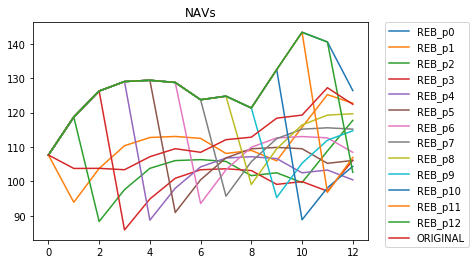

In [51]:
Idx = NAVs.columns
for i in range(len(Idx)):
    plt.plot(NAVs['REB_p'+str(i)+''], label = Idx[i]) 
plt.plot(navA, label='ORIGINAL')
plt.title('NAVs')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

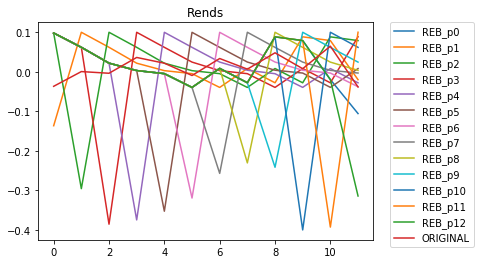

In [53]:
Idx = Rends.columns
for i in range(len(Idx)):
    plt.plot(Rends['REB_p'+str(i)+''], label = Idx[i]) 
plt.plot(Rend(narch,navA), label='ORIGINAL')
plt.title('Rends')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### MEDIDAS DE DESEMPEÑO

In [61]:
medidas_desempeño(narch,Rend(narch,navA),tl)

(0.010709036133849145, 0.030310267941802898, -0.14156799518861732)

In [ ]:
# Función para calcular el rendimiento de las series
def Rend(narch,name):
    h =[]
    for i in range(narch-1):
        y= np.log(name[i+1]/name[i])
        h.append(y)
    return h

In [60]:
#Función para calcular las medidas de desepeño ( Rendimiento, Variación y sharpe)
def medidas_desempeño(narch,Rend,tl):
    media = np.mean(Rend)
    std = np.std(Rend)
    sharpe = (media -tl[i]/100)/std
    return media, std, sharpe

In [ ]:
def medidas_desempeño(narch,name,tl):
    h =[]
    for i in range(narch-1):
        y= np.log(name[i+1]/name[i])
        h.append(y)
    media = np.mean(h)
    std = np.std(h)
    sharpe = (media -tl)/std
    return media, std, sharpe

In [ ]:
h = pd.DataFrame(index=['Rendimiento','Volatilidad','Sharpe'])
for i in range(narch):
        nomp = 'REBp'+str(i)+''
        h[nomp] = medidas_desempeño(narch,REBcomp[nomp],tl[i]/100)
h = h.T
h

In [ ]:
#Idx = h.columns
#for i in range(len(Idx)):
#    plt.plot(h[h.columns[i]], label = Idx[i]) 
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

### VALOR NAV (Net Asset Value) o VL(Valor liquidativo)
La rentabilidad pasada no es indicativa de la rentabilidad futura y no debe ser el único factor que se considere a la hora de seleccionar un producto. Los datos de rentabilidad se basan en el valor liquidativo (Net Asset Value, NAV) del ETF que puede no ser el mismo que el precio de mercado del ETF. Los accionistas individuales pueden obtener rendimientos distintos de la rentabilidad del NAV.


VL = P / N = Patrimonio neto del fondo(Valor de la Cartera del fondo) / Número de participaciones del fondo.

*El valor de la cartera de fondo es precios x shares.*
*El número de participaciones del fondo falta sacarlo.*

In [ ]:
nav_m = [info.loc[i]['NAV per Share'][0] for i in fechas]
shares_out = [info.loc[i]['Shares Outstanding'][0] for i in fechas]
info_m = pd.DataFrame(index=fechas)
info_m['NAV per Share'] = nav_m
info_m['Shares Outstanding'] = shares_out
info_m

In [ ]:
plt.plot(info_m['NAV per Share'])
plt.title('NAV per Share')
plt.show()

### COMPARACIÓN DE RESULTADOS: REBALANCEO VS. MISMAS POSICIONES

In [ ]:
# MEDIDAS DE ATRIBUCIÓN AL DESEMPEÑO

### CONCLUSIONES
.....

In [ ]:
# LIMPIEZA DE DATOS 
def clean_data(narch, prices, holdings):
    d =[]
    hold = []
    for i in range(narch):
        a = set(list(prices[i].index))
        b = set(list(holdings[i].index))
        c = []
        for item in b:
            if item not in a:
                 c.append(item)
        d.append(c)
        holdi = holdings[i].drop(d[i]) # Se eliminan datos de ishares que no estan en quandl.
        hold.append(holdi)
    return hold
d = clean_data(narch, prices, holdings)
d

### BIBLIOGRAFÍA
https://www.portafolio.co/economia/finanzas/son-etf-293754

https://economipedia.com/definiciones/etf-fondos-cotizados.html

https://www.ishares.com/us/products/239508/#/

https://www.quandl.com/tools/python

